In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
sns.set_context('talk')
sns.set_style(style='darkgrid')

## Background 
The Olympics are considered to be the world's biggest sports competition. The Olympics consist of Winter and Summer games. 
These seasonal events vary greatly and the following analysis hopes to uncover similarities and differences between the two. The topics analyzed are : 
1. How participation in these events has changed over time. 
2. Best performers in Summer and Winter games. 
3. How does representation of female athletes across countries differ in Summer and Winter games.
4. How do athletes who participate in various Summer and Winter games differ physically. 

## Table of contents

1. [Data cleaning](#Data-loading-and-cleaning)<br>
2. [Analysis](#Analysis)<br>
    2.1 [Participation in Summer and Winter Olympics](#Analysis-1:-Participation-over-years-in-Summer-and-Winter-Olympics)<br>
    2.2 [Top performers in Summer and Winter Olympics](#Analysis-2:-Top-performers-measured-by-total-tally-of-medals-and-by-average-medals-won-per-year)<br>
    2.3 [Representation of female athletes in Summer and Winter Olympics](#Analysis-3:-Representation-in-national-teams-in-Summer-&-Winter-Olympics)<br>
    2.4 [Comparison of Height & Weight of athletes in Summer and Winter Olympics](#Analysis-4:-Average-Height-&-Weight-of-athletes-by-sporting-event-in-Summer-&-Winter-games)<br>

## Data loading and cleaning

Dataset read - 
- athlete_csv : A dataset containing information about athletes from various national teams by Year. Dataset also contains information like Sex, Age, Summer/Winter game, Sport, Medal etc.
- noc.csv - A dataset that connects NOCs (National Olympic Committees) to Countries

In [5]:
athletes = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

Merge the two datasets.

In [6]:
df = athletes.merge(noc, on='NOC')

In [7]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN


## Analysis

### Analysis 1: Participation over years in Summer and Winter Olympics

Function to return unique number of participating countries per Olympic year.

In [8]:
def NOC(x):
    NOC_list = x.NOC.unique()
    return(len(NOC_list))

Generate dataframe with number of participating countries for each year Summer Olympics was held.

In [9]:
df2 = df[(df.Season == 'Summer')].groupby('Year').apply(lambda x: NOC(x)).reset_index().rename(columns={0:'NOC'})

dataformat = {'x':[1896, 1904, 1948, 1952, 1976, 1980, 2016], 'y':[12, 15, 58, 68, 91, 80, 206], 
                         'text':['1896<br>12 participting teams', '1904<br>Absent:<br>Russia<br>Japan', 
                                 '1948<br>Debut:<br>Iran<br>Venezuela<br><br>Absent:<br>Germany<br>Japan', 
                                 '1952<br>Debut:<br>USSR', '1976<br>Absent:<br>Egypt<br>Nigeria<br>Kenya',
                                 '1980<br>Absent:<br>United States<br>Japan<br>Canada', 
                                 '2016<br>206 participating teams']}
df_format = pd.DataFrame(data = dataformat)

df3 = df2.merge(df_format, how='left', left_on='Year', right_on='x')
df3.drop(columns=['x', 'y'], inplace=True)
df3.loc[df3.text.isna(), 'text'] = ''

Generate dataframe with number of participating countries for each year Winter Olympics was held.

In [10]:
df4 = df[(df.Season == 'Winter')].groupby('Year').apply(lambda x: NOC(x)).reset_index().rename(columns ={0:'NOC'})

dataformat2 = {'x':[1924, 1948, 1952, 1956, 2014], 'y':[19, 28, 30, 32, 89], 
                         'text':['1924<br>19 participting teams',  
                                 '1948<br>Debut:<br>Denmark<br>Korea<br><br>Absent:<br>Germany<br>Japan', 
                                 '1952<br>Debut:<br>Portugal<br>New Zealand', '1956<br>Debut:<br>USSR',
                                 '2014<br>89 participating teams']}
df_format2 = pd.DataFrame(data = dataformat2)

df5 = df4.merge(df_format2, how='left', left_on='Year', right_on='x')
df5.drop(columns=['x', 'y'], inplace=True)
df5.loc[df5.text.isna(), 'text'] = ''

In [11]:
init_notebook_mode(connected=True)

years = df2.Year.values.tolist()
years_txt = [str(y) for y in years]
data1 = go.Bar(x=df3.Year, y=df3.NOC, text=df3.text, hoverinfo='text', marker=dict(color='#ff8000'), name='Summer', 
               showlegend=False)

years2 = df4.Year.values.tolist()
years2_txt = [str(y) for y in years2]
data2 = go.Bar(x=df5.Year, y=df5.NOC, text=df5.text, hoverinfo='text', marker=dict(color='#3399ff'), name='Winter', 
               showlegend=False)

data = [data1, data2]

annotations1 = [dict(x=1904, y=15, xref='x', yref='y', text='Russo-Japanese War', ax=1, ay=-200,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='red', 
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8), 
               dict(x=1914, y=0, xref='x', yref='y', text='World War I', ax=1, ay=-180, 
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='red',
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8), 
               dict(x=1940, y=0, xref='x', yref='y', text='World War II', ax=1, ay=-180, 
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='red',
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8), 
               dict(x=1980, y=80, xref='x', yref='y', text='Soviet invasion of Afghanistan', ax=1, ay=-200,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='red', 
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8)]
annotations2 = [dict(x=1940, y=0, xref='x', yref='y', text='World War II', ax=1, ay=-180, 
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='blue',
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8), 
               dict(x=1994, y=67, xref='x', yref='y', text='Summer and Winter games seperated', ax=1, ay=-200,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=2, bordercolor='blue', 
                    borderwidth=0, borderpad=0, bgcolor='#fbfcfc', opacity=0.8)]
                    
updatemenus = list([dict(active=-1, buttons=list([   
            dict(label='Summer', method='update',
                 args = [{'visible': [True, False]}, {'title': 'Participation in Summer Olympics', 
                                                      'annotations': annotations1, 'titlefont': dict(size=20)}]),
            dict(label='Winter', method='update',
                 args = [{'visible': [False, True]}, {'title': 'Participation in Winter Olympics', 
                                                      'annotations': annotations2, 'titlefont': dict(size=20)}])
            ]))])

layout1 = dict(showlegend=False, updatemenus=updatemenus, height=500, width=1000, 
              xaxis=dict(title='Year', titlefont=dict(size=18), showticklabels=True, tickfont=dict(size=15, color='black'), 
                        dtick=4), 
               yaxis=dict(title='Count of countries', titlefont=dict(size=18), showticklabels=True, 
                               tickfont=dict(size=15, color='black')))

fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1, filename='Olympics1')

The first <b>Summer games</b> were held in 1896, more than a 100 years ago. As you can see the games were cancelled during the first and second world war. Certain years such as 1904 and 1980 saw a dip in participation due to conflicts between countries. For eg. around 66 countries boycotted the Summer Olympics in 1980 to protest the Soviet invasion of Afghanistan. Participation has increased in certain years, again due to certain political and social developments. For eg. A lot of countries made their debut in 1948. Korea, Iran, Venezuela participated in the Olympics for the first time in 1948. Also Germany and Japan were not allowed to participate that year due to their involvement in WWII. <br>

The <b>Winter games</b> were first held in 1924. These games were also suspended during the 2nd World War. An interesting point to note is that till the year 1992, Summer and Winter games were held in the same year. Ever since then they are held 2 years apart.  

### Analysis 2: Top performers measured by total tally of medals and by average medals won per year

Create dataframes that contain top 10 performers in Summer Olympics and Winter Olympics by medal tally.

In [12]:
def medals(x):
    return((len(x.Medal.unique())))

In [13]:
## Dictionary of NOCs and regions
df_NOC_region = df[['NOC', 'region']].drop_duplicates().dropna()

In [14]:
df_event_medals = df[(df.Season == 'Summer')&(df.Medal.notnull())].groupby(['NOC', 'Year', 'Event']).apply(
    lambda x: medals(x)).reset_index()
df_medals_summer0 = df_event_medals.groupby(['NOC'])[0].sum().sort_values(ascending=False).head(10).reset_index().rename(
    columns={0:'medal_tally'})
df_medals_summer = df_medals_summer0.merge(df_NOC_region, on='NOC', how='left')
df_medals_summer.loc[df_medals_summer.NOC == 'URS', 'region'] = 'Soviet Union'

df_event_medals1 = df[(df.Season == 'Winter')&(df.Medal.notnull())].groupby(['NOC', 'Year', 'Event']).apply(
    lambda x: medals(x)).reset_index()
df_medals_winter0 = df_event_medals1.groupby(['NOC'])[0].sum().sort_values(ascending=False).head(10).reset_index().rename(
    columns={0:'medal_tally'})
df_medals_winter = df_medals_winter0.merge(df_NOC_region, on='NOC', how='left')
df_medals_winter.loc[df_medals_winter.NOC == 'URS', 'region'] = 'Soviet Union'

Create dataframes that contain top 10 performers in Summer Olympics and Winter Olympics by avg medals per year.

In [15]:
df_summer_games = df_event_medals.groupby(['NOC'])['Year'].apply(lambda x: len(x.unique())).reset_index().rename(columns=
    {'Year':'no_of_olympics'})
df_avg_summer = df_summer_games.merge(df_medals_summer, on='NOC', how='inner')
df_avg_summer['avg_medals'] = (df_avg_summer['medal_tally']) / (df_avg_summer['no_of_olympics'])
df_avg_summer.sort_values('avg_medals', ascending=False, inplace=True)
df_avg_summer.loc[df_avg_summer.NOC=='URS', 'region'] = 'Soviet Union'

df_winter_games = df_event_medals1.groupby(['NOC'])['Year'].apply(lambda x: len(x.unique())).reset_index().rename(columns=
    {'Year':'no_of_olympics'})
df_avg_winter = df_winter_games.merge(df_medals_winter, on='NOC', how='inner')
df_avg_winter['avg_medals'] = (df_avg_winter['medal_tally']) / (df_avg_winter['no_of_olympics'])
df_avg_winter.sort_values('avg_medals', ascending=False, inplace=True)
df_avg_winter.loc[df_avg_winter.NOC=='URS', 'region'] = 'Soviet Union'

In [16]:
init_notebook_mode(connected=True)

data3 = go.Bar(y=df_medals_summer.region, x=df_medals_summer.medal_tally, text=df_medals_summer.medal_tally, hoverinfo='text', 
               name='Summer', marker=dict(color='#ff8000'), orientation='h')
data4 = go.Bar(y=df_medals_winter.region, x=df_medals_winter.medal_tally, text=df_medals_winter.medal_tally, hoverinfo='text', 
               name='Winter', marker=dict(color='#3399ff'), orientation='h')
data5 = go.Bar(y=df_avg_summer.region, x=df_avg_summer.avg_medals, text=df_avg_summer.avg_medals, hoverinfo='text', 
               name='Summer', marker=dict(color='#ff8000'), showlegend=False, orientation='h')
data6 = go.Bar(y=df_avg_winter.region, x=df_avg_winter.avg_medals, text=df_avg_winter.avg_medals, hoverinfo='text', 
               name='Winter', marker=dict(color='#3399ff'), showlegend=False, orientation='h')

data = [data3, data4, data5, data6]


fig2 = tools.make_subplots(rows=1, cols=2, subplot_titles=('Top Countries by Medal Tally', 
                                                           'Top Countries by Avg Medals per Year'), 
                           horizontal_spacing=0.25)

fig2.append_trace(data3, 1,1)
fig2.append_trace(data4, 1, 1)
fig2.append_trace(data5, 1, 2)
fig2.append_trace(data6, 1, 2)

fig2['layout']['yaxis1'].update(title='Country', titlefont=dict(size=18), automargin=True)
fig2['layout']['yaxis2'].update(title='Country', titlefont=dict(size=18), automargin=True)

fig2['layout']['xaxis1'].update(title='Medal count', titlefont=dict(size=18))
fig2['layout']['xaxis2'].update(title='Avg Medal count', titlefont=dict(size=18))

fig2['layout']['updatemenus'] = list([dict(active=-1, buttons=list([   
            dict(label='Summer', method='update',
                 args = [{'visible': [True, False]}, {'title': 'Top Performers in Summer Games', 
                                                      'titlefont': dict(size=20)}]),
            dict(label='Winter', method='update',
                 args = [{'visible': [False, True]}, {'title': 'Top Performers in Winter Games', 
                                                     'titlefont': dict(size=20)}])
            ]), direction='down', x=0.48, xanchor='center', y=1.1, yanchor='top' )])


fig2['layout'].update(height=500, width=1000, showlegend=False, 
                      xaxis=dict(autorange='reversed', tickfont=dict(size=15), tickformat='s'),
                      xaxis2=dict(tickfont=dict(size=15)),
                      yaxis=dict(autorange='reversed', tickfont=dict(size=14), tickprefix="          "), 
                      yaxis2=dict(autorange='reversed', side='right', tickfont=dict(size=14), ticksuffix="          "))

plotly.offline.iplot(fig2, filename='Olympics2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



<b>Summer Olympics</b><br>
Most medals won by a country - USA (2544) followed by the Soviet Union (1005).
However, when we look at average medals won per year it seems the Soviets were most dominant as they averaged more than 100 medals every year. China is third on that list given their outstanding performance in the last few years.

<b>Winter Olympics</b><br>
Even though the United States does well as far as the overall medal tally is concerned, Scandinavian countries dominate the list. Norway stands first with 319 medals. 
When it comes to average medals won , the Russians hit it out of the park. The list is headed by the Soviet Union, closely followed by Russia each of whom average more than 20 medals. 

These plots are a testament to the fact that the Soviets were an undisputed force in the Olympics. 

### Analysis 3: Representation in national teams in Summer & Winter Olympics

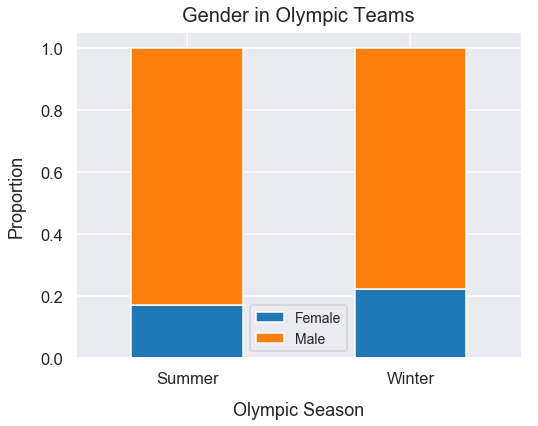

In [17]:
## Subset Sex per Season. Year and Name are considered so that every athlete from each country is only considered once.
## Average of annual averages calculated to make the figure as accurate as possible.
df_Sex = df[['Season', 'Year', 'Sex', 'Name']].drop_duplicates()
df_Sex.drop(columns=['Name'], inplace=True)
df_Sex1 = pd.get_dummies(df_Sex, columns=['Sex'])
df_Sex2 = df_Sex1.groupby(['Season', 'Year'])[('Sex_F', 'Sex_M')].mean()
df_Sex3 = df_Sex2.groupby('Season')[('Sex_F', 'Sex_M')].mean()

df_Sex3.plot(kind='bar', figsize=(8, 6), stacked=True)
plt.title("Gender in Olympic Teams", fontsize=20, y=1.015)
plt.ylabel("Proportion", fontsize=18, labelpad=15);
plt.xlabel("Olympic Season", fontsize=18, labelpad=15)
plt.xticks(rotation=0)
plt.legend(labels=['Female', 'Male'], loc='best', fontsize=14);

The proportion of female athletes overall is around 20%. There seems to be more female representation in the Winter games than the Summer games.

Read in 'geo' dataset. The datast contains country names and Geo codes. To be used for geo plotting later.

In [18]:
geo = pd.read_csv('geo_codes.csv')
geo.head(3)

,COUNTRY,CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA


Change certain region names to match the Olympic dataframe with the 'geo' dataframe.

In [19]:
df_Gender = df
df_Gender.loc[df_Gender.region=='USA', 'region'] = 'United States'
df_Gender.loc[df_Gender.region=='UK', 'region'] = 'United Kingdom'
df_Gender.loc[df_Gender.region=='Antigua', 'region'] = 'Antigua and Barbuda'
df_Gender.loc[df_Gender.region=='Bahamas', 'region'] = 'Bahamas, The'
df_Gender.loc[df_Gender.region=='Boliva', 'region'] = 'Bolivia'
df_Gender.loc[df_Gender.region=='Cape Verde', 'region'] = 'Cabo Verde'
df_Gender.loc[df_Gender.region=='Democratic Republic of the Congo', 
                      'region'] = 'Congo, Democratic Republic of the'
df_Gender.loc[df_Gender.region=='Gambia', 'region'] = 'Gambia, The'
df_Gender.loc[df_Gender.region=='Micronesia', 'region'] = 'Micronesia, Federated States of'
df_Gender.loc[df_Gender.region=='North Korea', 'region'] = 'Korea, North'
df_Gender.loc[df_Gender.region=='Saint Kitts', 'region'] = 'Saint Kitts and Nevis'
df_Gender.loc[df_Gender.region=='South Korea', 'region'] = 'Korea, South'
df_Gender.loc[df_Gender.region=='Trinidad', 'region'] = 'Trinidad and Tobago'
df_Gender.loc[df_Gender.region=='Virgin Islands, British', 'region'] = 'British Virgin Islands'
df_Gender.loc[df_Gender.region=='Virgin Islands, US', 'region'] = 'Virgin Islands'

To ensure analysis is not skewed by low participation, consider only those countries who have been a part of at least 5 Summer Olympics.

In [20]:
dfSummer_Year_count = df_Gender[(df_Gender.Season == 'Summer')].groupby('region')['Year'].apply(
    lambda x: len(x.unique())).reset_index().rename(columns={'Year': 'Year_count'})
min5yr_summer = dfSummer_Year_count[dfSummer_Year_count['Year_count'] > 4]['region'].values

df_Summer_Gender = df_Gender[(df_Gender.Season == 'Summer') & (df_Gender.region.isin(min5yr_summer))][[
    'Year', 'region', 'Sex', 'Name']].drop_duplicates()
df_Summer_Gender1 = pd.get_dummies(df_Summer_Gender, columns=['Sex'])
df_Summer_Gender2 = df_Summer_Gender1.groupby(['region', 'Year'])[('Sex_F', 'Sex_M')].mean()
df_Summer_Gender3 = df_Summer_Gender2.groupby('region')[('Sex_F', 'Sex_M')].mean().reset_index()

df_Summer_stats = df_Summer_Gender3.set_index('region').join(geo.set_index('COUNTRY')).dropna()
df_Summer_stats['Female_ratio'] = round(df_Summer_stats['Sex_F'], 2)
df_Summer_stats.drop(columns=['Sex_F', 'Sex_M'], inplace=True)

In [21]:
data10 = [ dict(
        type='choropleth',
        locations=df_Summer_stats['CODE'],
        z=df_Summer_stats['Female_ratio'],
        text=df_Summer_stats.index,
        colorscale=[[0,"rgb(128,0,0)"], [0.35,"rgb(139,0,0)"], [0.5,"rgb(165,42,42)"],\
            [0.6,"rgb(255,0,0)"], [0.7,"rgb(255,99,71)"], [1,"rgb(255,160,122)"]],
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict (
                color='rgb(180,180,180)',
                width=0.5
            ) ),
        colorbar=dict(
            autotick=False,
            title='Proportion of female athletes', titlefont=dict(size=15)),
      ) ]

layout5 = dict(
    title='Proportion of Female Athletes in Summer Olympics', 
    titlefont=dict(size=20), 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig5 = dict(data=data10, layout=layout5)
py.iplot(fig5, validate=False)

<b>Summer Olympics</b><br>
Surprisingly the countries with the most female representation seem to be Bhutan, North Korea, Belarus, Ukraine and Angola. 

To ensure analysis is not skewed by low participation, consider only those countries who have been a part of at least 3 Winter Olympics.

In [22]:
dfWinter_Year_count = df_Gender[(df_Gender.Season == 'Winter')].groupby('region')['Year'].apply(
    lambda x: len(x.unique())).reset_index().rename(columns={'Year': 'Year_count'})
min5yr_winter = dfWinter_Year_count[dfWinter_Year_count['Year_count'] > 2]['region'].values

df_Winter_Gender = df_Gender[(df_Gender.Season == 'Winter') & (df_Gender.region.isin(min5yr_winter))][[
    'Year', 'region', 'Sex', 'Name']].drop_duplicates()
df_Winter_Gender1 = pd.get_dummies(df_Winter_Gender, columns=['Sex'])
df_Winter_Gender2 = df_Winter_Gender1.groupby(['region', 'Year'])[('Sex_F', 'Sex_M')].mean()
df_Winter_Gender3 = df_Winter_Gender2.groupby('region')[('Sex_F', 'Sex_M')].mean().reset_index()

df_Winter_stats = df_Winter_Gender3.set_index('region').join(geo.set_index('COUNTRY')).dropna()
df_Winter_stats['Female_ratio'] = round(df_Winter_stats['Sex_F'], 2)
df_Winter_stats.drop(columns=['Sex_F', 'Sex_M'], inplace=True)

In [23]:
data11 = [ dict(
        type='choropleth',
        locations=df_Winter_stats['CODE'],
        z=df_Winter_stats['Female_ratio'],
        text=df_Winter_stats.index,
        colorscale=[[0,"rgb(5, 10, 172)"], [0.35,"rgb(40, 60, 190)"], [0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"], [0.7,"rgb(106, 137, 247)"], [1,"rgb(220, 220, 220)"]],
        autocolorscale=False,
        reversescale=True,
        marker=dict(
            line=dict (
                color='rgb(180,180,180)',
                width=0.5
            ) ),
        colorbar=dict(
            autotick=False,
            title='Proportion of female athletes', 
            titlefont=dict(size=15)),
      ) ]

layout6 = dict(
    title='Proportion of Female Athletes in Winter Olympics', 
    titlefont=dict(size=20), 
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection=dict(
            type='Mercator'
        )
    )
)

fig6 = dict(data=data11, layout=layout6)
py.iplot(fig6, validate=False)

<b>Winter Olympics</b><br>
Countries with the most female representation seem to be North Korea, China, Uzbekistan, Ukraine and Azerbaijan.

This analysis that looks into the representation of female athletes in Olympic teams has been the most surprising so far. Notwithstanding some outliers due to low participation, these plots most certainly are educational in terms of how female representation is high among certain countries listed above and low or average among some countries that have high social indicators.

### Analysis 4: Average Height & Weight of athletes by sporting event in Summer & Winter games 

In [24]:
## Subset Height and Weight per Sport. Region and Name are considered so that every athlete from each country 
## is only considered once.
## To avoid cluttering, only the most recent Summer and Winter games are considered for this visualization
df_htwt = df[(df.Year==2014) | (df.Year==2016)]
df_ht0 = df_htwt[['Season', 'region', 'Name', 'Sport', 'Height']].sort_values(
    by='Height', ascending=False).drop_duplicates().dropna()
df_ht = df_ht0.groupby(['Season', 'Sport']).mean().reset_index()
df_wt0 = df_htwt[['Season', 'region', 'Name', 'Sport', 'Weight']].sort_values(
    by='Weight', ascending=False).drop_duplicates().dropna()
df_wt = df_wt0.groupby(['Season', 'Sport']).mean().reset_index()

df_htwt_scatter = df_ht.merge(df_wt, on=['Season', 'Sport'], how='inner')

In [25]:
data = [
    go.Scatter(mode='markers', x=df_htwt_scatter[df_htwt_scatter.Season=='Summer']['Height'], 
               y=df_htwt_scatter[df_htwt_scatter.Season=='Summer']['Weight'], 
               text=df_htwt_scatter[df_htwt_scatter.Season=='Summer']['Sport'], hoverinfo='text', 
               marker=dict(color='#ff8000', size=10), 
               name='Summer Games'
              ), 
    go.Scatter(mode='markers', x=df_htwt_scatter[df_htwt_scatter.Season=='Winter']['Height'], 
               y=df_htwt_scatter[df_htwt_scatter.Season=='Winter']['Weight'], 
               text=df_htwt_scatter[df_htwt_scatter.Season=='Winter']['Sport'], hoverinfo='text', 
               marker=dict(color='#3399ff', size=10), 
               name='Winter Games'
              )]

annotations3 = [dict(x=191.7, y=88, xref='x', yref='y', text='Basketball', ax=-50, ay=20,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8), 
                dict(x=190.5, y=80.3, xref='x', yref='y', text='Volleyball', ax=50, ay=20,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8), 
                dict(x=182.2, y=92.2, xref='x', yref='y', text='Bobsleigh', ax=-40, ay=20,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8), 
                dict(x=161.4, y=56, xref='x', yref='y', text='Gymnastics', ax=50, ay=20,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8), 
                dict(x=169, y=50.4, xref='x', yref='y', text='Rythmic Gymnastics', ax=80, ay=-20,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8), 
                dict(x=168.5, y=60.2, xref='x', yref='y', text='Figure Skating', ax=-50, ay=-30,
                    font=dict(size=15, color='#34495e'), align='center', arrowwidth=1, bordercolor='#090000', 
                    borderwidth=2, borderpad=1, bgcolor='#fbfcfc', opacity=0.8)]

layout7 = dict(height=600, width=1000, title='Avg. Height & Weight by Sport in Summer & Winter Olympics', 
               titlefont=dict(size=20), annotations=annotations3, 
               xaxis=dict(title='Height (cms)', titlefont=dict(size=18), 
                         showticklabels=True, tickfont=dict(size=15, color='black'), dtick=4), 
               yaxis=dict(title='Weight (kgs)', titlefont=dict(size=18), showticklabels=True, 
                               tickfont=dict(size=15, color='black')))

fig7 = dict(data=data, layout=layout7)
plotly.offline.iplot(fig7)

<b>Summer Olympics</b><br>
The tallest athletes play Basketball, which is not surprising.Volleyball and Beach Volleyball players are next in line. 
Also, based on median values the shortest athletes are Gymnasts and Divers.<br> 
The heaviest athletes are again from Basketball teams. Handball players are not far behind. 
Synchronized swimmers and gymnasts on an average are lighter than athletes who play other sports. 

<b>Winter Olympics</b><br>
Bobsleigh teams have the tallest athletes on average followed by Ice Hockey teams.The shortest athletes are from the Figure Skating team. Again, Bobsleigh teams have the heaviest athletes on average followed by Ice Hockey teams.Ski jumpers and Figure skaters are relatively lighter when compared to athletes from other teams. 

The plot definitely points towards the fact that athletes who play certain sports like Basketball, Volleyball, Bobsleighing and Ice Hockey tend to be bigger in size than the rest. On the other hand Gymnasts, Synchronized swimmers and Figure skaters tend to be shorter and lighter. Plus, athletes from Summer Olympics definitely have a longer range as far as height and weight are considered.